In [1]:
import scanpy as sc
import scvelo as scv
import os
from anndata import AnnData as ad
import pandas as pd

Read dataset 

In [2]:
# adata = scv.datasets.dentategyrus_lamanno("../../project_folder/datasets/raw/dentategyrus.loom")

Save counts 

In [3]:
# adata.layers["X_counts"] = adata.X.copy()

In [4]:
# adata.write_h5ad("../../project_folder/datasets/raw/dentategyrus.h5ad")

In [5]:
adata = sc.read_h5ad("../../project_folder/datasets/raw/dentategyrus.h5ad")

In [6]:
adata.layers["X_counts"] = adata.X.copy()

In [7]:
adata_full = adata.copy()

In [8]:
sc.pp.filter_genes(adata_full, min_cells=5)

HVG selection

In [9]:
sc.pp.highly_variable_genes(
    adata,
    flavor="seurat_v3",
    n_top_genes=2000,
    layer="X_counts",
    subset=True,
)

Preprocess

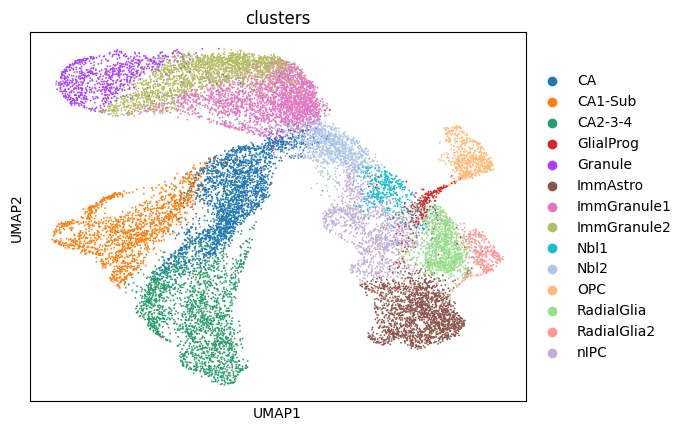

In [10]:
sc.pp.log1p(adata)
sc.tl.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.pl.umap(adata, color=["clusters"])

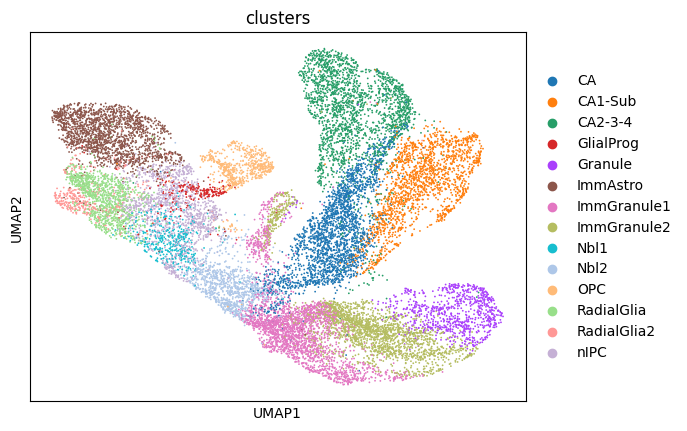

In [11]:
sc.pp.log1p(adata_full)
sc.tl.pca(adata_full)
sc.pp.neighbors(adata_full)
sc.tl.umap(adata_full)
sc.pl.umap(adata_full, color=["clusters"])

In [12]:
adata.obs = adata.obs.rename({"clusters": "cell_type"})

In [13]:
adata_full.obs = adata_full.obs.rename({"clusters": "cell_type"})

Save

In [14]:
ad.write_h5ad(adata, "../../project_folder/datasets/processed/dentategyrus.h5ad")

In [15]:
ad.write_h5ad(adata_full, "../../project_folder/datasets/processed_full_genome/dentategyrus.h5ad")